In [1]:
import pandas as pd

df_train = pd.read_csv('subset_train_expanded.csv')
df_valid = pd.read_csv('subset_valid_expanded.csv')
df_test = pd.read_csv('subset_test_expanded.csv')

In [2]:
INPUT_VARS = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

X_train = df_train[INPUT_VARS]
X_valid = df_valid[INPUT_VARS]
X_test = df_test[INPUT_VARS]

y_train = df_train['Machine failure']
y_valid = df_valid['Machine failure']
y_test = df_test['Machine failure']

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [4]:
from sklearn.metrics import classification_report

y_train_hat = lda.predict(X_train)
y_valid_hat = lda.predict(X_valid)
y_test_hat = lda.predict(X_test)

print(classification_report(y_train, y_train_hat))
print(classification_report(y_valid, y_valid_hat))
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      6762
           1       0.83      0.82      0.83      6873

    accuracy                           0.83     13635
   macro avg       0.83      0.83      0.83     13635
weighted avg       0.83      0.83      0.83     13635

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1932
           1       0.84      0.82      0.83      1972

    accuracy                           0.83      3904
   macro avg       0.83      0.83      0.83      3904
weighted avg       0.83      0.83      0.83      3904

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       967
           1       0.81      0.79      0.80       986

    accuracy                           0.80      1953
   macro avg       0.81      0.81      0.80      1953
weighted avg       0.81      0.80      0.80      1953



In [5]:
from sklearn.metrics import accuracy_score

def fitness_function(params):

    tol = params[0]
    _lda = LinearDiscriminantAnalysis(tol=tol)
    _lda.fit(X_train, y_train)
    _y_test_hat = _lda.predict(X_test)
    return (1 - accuracy_score(y_test, _y_test_hat))

In [6]:
from ecabc import ABC
from time import time

abc = ABC(50, fitness_function)
abc.add_param(1e-10, 1e-1, restrict=True, name='tol')
abc.initialize()

ave_fitness = []
ave_ret_val = []
best_fitness = []
best_ret_val = []
best_params = []
for i in range(50):
    abc.search()
    print(f'Iteration: {i + 1} | {time()}')
    ave_fitness.append(abc.average_fitness)
    ave_ret_val.append(abc.average_ret_val)
    best_fitness.append(abc.best_fitness)
    best_ret_val.append(abc.best_ret_val)
    best_params.append(abc.best_params)

best_param_vals = abc.best_params

Iteration: 1 | 1637686415.09821
Iteration: 2 | 1637686416.476316
Iteration: 3 | 1637686417.8615181
Iteration: 4 | 1637686419.240372
Iteration: 5 | 1637686420.618916
Iteration: 6 | 1637686421.9969301
Iteration: 7 | 1637686423.394017
Iteration: 8 | 1637686424.839606
Iteration: 9 | 1637686426.209177
Iteration: 10 | 1637686427.579982
Iteration: 11 | 1637686428.945927
Iteration: 12 | 1637686430.314429
Iteration: 13 | 1637686431.679282
Iteration: 14 | 1637686433.049977
Iteration: 15 | 1637686434.4202182
Iteration: 16 | 1637686435.785543
Iteration: 17 | 1637686437.1628
Iteration: 18 | 1637686438.530665
Iteration: 19 | 1637686439.9044402
Iteration: 20 | 1637686441.273746
Iteration: 21 | 1637686442.641703
Iteration: 22 | 1637686444.007923
Iteration: 23 | 1637686445.376292
Iteration: 24 | 1637686446.745631
Iteration: 25 | 1637686448.116383
Iteration: 26 | 1637686449.4871738
Iteration: 27 | 1637686450.858751
Iteration: 28 | 1637686452.224886
Iteration: 29 | 1637686453.59505
Iteration: 30 | 163768

<Figure size 432x288 with 0 Axes>

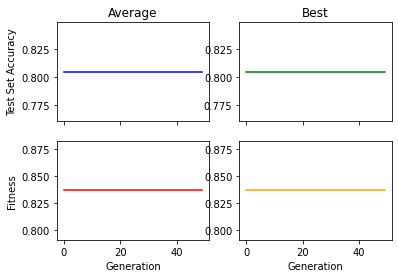

In [7]:
from matplotlib import pyplot as plt

generation = [i for i in range(len(ave_fitness))]

plt.clf()
fig, axs = plt.subplots(2, 2, sharex='col')
axs[1, 0].set_xlabel('Generation')
axs[1, 1].set_xlabel('Generation')
axs[0, 0].set_ylabel('Test Set Accuracy')
axs[1, 0].set_ylabel('Fitness')
axs[0, 0].set_title('Average')
axs[0, 1].set_title('Best')

ave_test_accuracy = [1 - i for i in ave_ret_val]
best_test_accuracy = [1 - i for i in best_ret_val]

axs[0, 0].plot(generation, ave_test_accuracy, color='blue')
axs[0, 1].plot(generation, best_test_accuracy, color='green')
axs[1, 0].plot(generation, ave_fitness, color='red')
axs[1, 1].plot(generation, best_fitness, color='orange')

plt.show()

Can't be tuned???